# Basic Data Transformation (for editing mechanism and edited/unedited status)

(hard-coded)

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('../../data/GSE218462_raw_counts_GRCh38.p13_NCBI.tsv', sep='\t')
df = df.T
df.columns = df.iloc[0]
df = df[1:]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data)

scaled_df.columns = df.columns
scaled_df.index = df.index
unedited = ['GSM6745632', 'GSM6745633', 'GSM6745634', 'GSM6745635', 'GSM6745636', 'GSM6745637']
scaled_df['Edited (1) or Unedited (0)'] = scaled_df.index.map(lambda gene: 0 if gene in unedited else 1)
mechanisms = {
    "BE4": ["GSM6745599", "GSM6745600", "GSM6745601", "GSM6745611", "GSM6745612", "GSM6745613"],
    "ABE8": ["GSM6745602", "GSM6745603", "GSM6745604", "GSM6745614", "GSM6745615", "GSM6745616"],
    "Cas9": ["GSM6745605", "GSM6745606", "GSM6745607", "GSM6745617", "GSM6745618", "GSM6745619"],
    "Utelectro": ["GSM6745608", "GSM6745609", "GSM6745610", "GSM6745620", "GSM6745621", "GSM6745622"],
    "dCas9": ["GSM6745623", "GSM6745624", "GSM6745625"],
    "BE4alone": ["GSM6745626", "GSM6745627", "GSM6745628"],
    "ABE8alone": ["GSM6745629", "GSM6745630", "GSM6745631"],
    "UT": ["GSM6745632", "GSM6745633", "GSM6745634", "GSM6745635", "GSM6745636", "GSM6745637"]
}

# Inverting the dictionary to map gene code to its corresponding key
mechanism_map = {gene: mechanism for mechanism, genes in mechanisms.items() for gene in genes}

# Adding a new column "editing mechanism" to categorize the gene codes in the index
scaled_df['editing mechanism'] = scaled_df.index.map(mechanism_map)

scaled_df

GeneID,100287102,653635,102466751,107985730,100302278,645520,79501,100996442,729737,102725121,...,4575,4568,4540,4541,4556,4519,4576,4571,Edited (1) or Unedited (0),editing mechanism
GSM6745599,0.212625,-0.318248,-0.042237,0.184916,1.063410,-0.29277,-0.235702,0.117663,0.140983,-0.006097,...,-0.267632,0.466206,-0.318275,-0.133587,0.136065,-0.604440,-0.270274,-0.375282,1,BE4
GSM6745600,-1.311857,-1.500716,-1.647234,-0.818915,1.063410,-0.29277,-0.235702,-1.159822,-0.267197,-1.511998,...,0.007233,1.309818,-0.981598,-0.819478,-0.337051,-1.184536,-1.084285,-0.450273,1,BE4
GSM6745601,1.127315,1.334520,0.492762,-0.818915,-0.773389,-0.29277,-0.235702,1.760144,1.722682,0.688935,...,0.969260,2.153430,1.484606,1.848533,1.741280,0.865277,1.357749,1.874436,1,BE4
GSM6745602,0.365073,-0.318248,-0.577236,0.184916,-0.773389,-0.29277,-0.235702,1.121401,0.498141,0.225580,...,0.282098,2.715838,0.638045,1.031012,0.913327,0.141225,0.041475,0.237141,1,ABE8
GSM6745603,0.669970,0.111740,-0.042237,1.188747,-0.773389,-0.29277,-0.235702,0.391410,-0.165152,0.804773,...,0.831828,1.028614,0.434101,0.974346,1.293509,0.187012,0.110753,0.624593,1,ABE8
GSM6745604,-0.092271,0.622352,1.562760,0.184916,-0.773389,-0.29277,-0.235702,0.756406,0.804276,-0.121935,...,1.381557,0.185003,1.132972,1.712771,2.053874,0.594337,1.115277,1.137029,1,ABE8
GSM6745605,0.669970,0.622352,-1.112235,-0.818915,-0.773389,-0.29277,-0.235702,0.026414,-0.012084,0.225580,...,2.206152,0.466206,-0.349242,0.224115,0.786600,-0.666955,-0.339551,0.862063,1,Cas9
GSM6745606,-0.702064,-1.231973,-0.577236,-1.822745,1.063410,3.41565,-0.235702,-1.159822,-0.828445,-1.048644,...,-0.817361,-0.096201,-0.984529,-0.787604,-0.413087,-1.281728,-0.997688,-0.900216,1,Cas9
GSM6745607,0.517522,0.138615,1.562760,1.188747,-0.773389,-0.29277,-0.235702,0.208912,-0.012084,0.457258,...,-0.130199,0.185003,0.108853,0.397654,0.474005,-0.268787,-0.443467,-0.125313,1,Cas9
GSM6745609,-0.092271,-0.801985,-1.112235,-0.818915,-0.773389,-0.29277,-0.235702,-0.886075,-1.185602,0.109742,...,-1.367091,-0.658609,-0.198254,-0.324244,-0.945342,-0.949860,-1.188201,-0.950210,1,Utelectro


In [25]:
scaled_df['editing mechanism']

GSM6745599          BE4
GSM6745600          BE4
GSM6745601          BE4
GSM6745602         ABE8
GSM6745603         ABE8
GSM6745604         ABE8
GSM6745605         Cas9
GSM6745606         Cas9
GSM6745607         Cas9
GSM6745609    Utelectro
GSM6745610    Utelectro
GSM6745611          BE4
GSM6745612          BE4
GSM6745613          BE4
GSM6745614         ABE8
GSM6745615         ABE8
GSM6745616         ABE8
GSM6745617         Cas9
GSM6745618         Cas9
GSM6745619         Cas9
GSM6745620    Utelectro
GSM6745621    Utelectro
GSM6745622    Utelectro
GSM6745623        dCas9
GSM6745624        dCas9
GSM6745625        dCas9
GSM6745626     BE4alone
GSM6745627     BE4alone
GSM6745628     BE4alone
GSM6745629    ABE8alone
GSM6745630    ABE8alone
GSM6745631    ABE8alone
GSM6745632           UT
GSM6745633           UT
GSM6745634           UT
GSM6745635           UT
GSM6745636           UT
GSM6745637           UT
Name: editing mechanism, dtype: object

# PCA

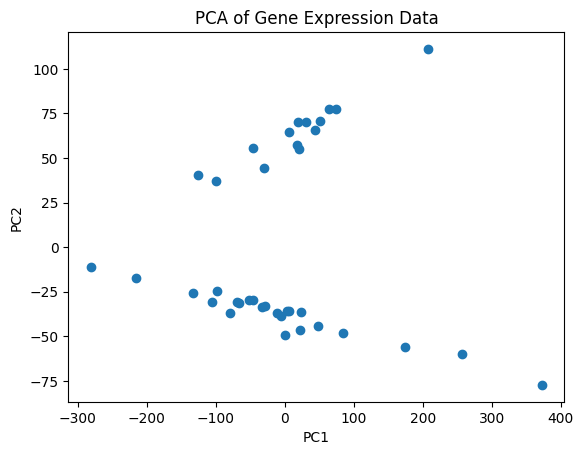

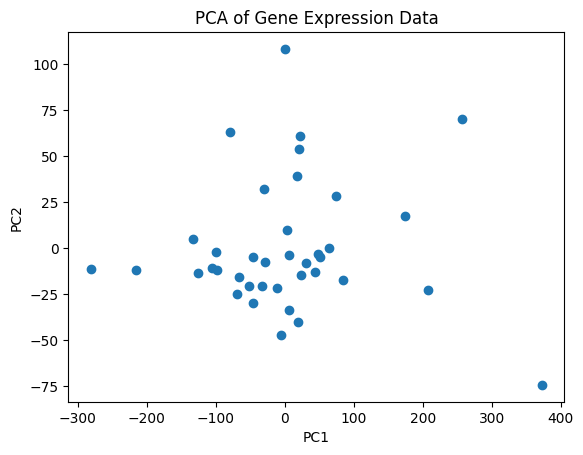

In [26]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca_df = scaled_df.drop(columns=['Edited (1) or Unedited (0)', 'editing mechanism'])

pca = PCA(n_components=5)

principalComponents = pca.fit_transform(pca_df)

principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# Plot the PCA result
plt.scatter(principalDf['PC1'], principalDf['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Gene Expression Data')
plt.show()

plt.scatter(principalDf['PC1'], principalDf['PC3'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Gene Expression Data')
plt.show()

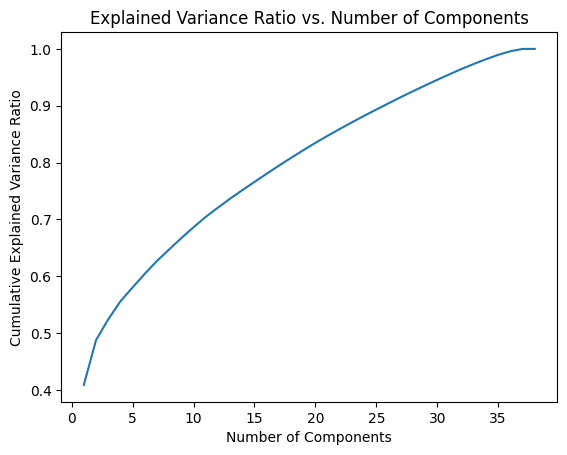

In [27]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Perform PCA
pca_df = scaled_df.drop(columns=['Edited (1) or Unedited (0)', 'editing mechanism'])
target1 = scaled_df['Edited (1) or Unedited (0)']
target2 = scaled_df['editing mechanism']
pca = PCA()
pca_result = pca.fit_transform(pca_df)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance ratio
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.show()

In [28]:
# Find the number of components that explain 95% of the variance
n_components_99 = np.argmax(cumulative_variance_ratio >= 0.99) + 1
print(f"Number of components explaining 99% of variance: {n_components_99}")

n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"Number of components explaining 95% of variance: {n_components_95}")

n_components_90 = np.argmax(cumulative_variance_ratio >= 0.90) + 1
print(f"Number of components explaining 90% of variance: {n_components_90}")

n_components_85 = np.argmax(cumulative_variance_ratio >= 0.85) + 1
print(f"Number of components explaining 85% of variance: {n_components_85}")

n_components_80 = np.argmax(cumulative_variance_ratio >= 0.80) + 1
print(f"Number of components explaining 80% of variance: {n_components_80}")

n_components_75 = np.argmax(cumulative_variance_ratio >= 0.75) + 1
print(f"Number of components explaining 75% of variance: {n_components_75}")

Number of components explaining 99% of variance: 36
Number of components explaining 95% of variance: 31
Number of components explaining 90% of variance: 26
Number of components explaining 85% of variance: 22
Number of components explaining 80% of variance: 18
Number of components explaining 75% of variance: 14


will move on from PCA1 and 2, kept trying to analyze the PCA with PCA1 and PCA2 that's used later, but it didn't come up with anything interesting, probably because I missed this part where the variance is explained by 36%~ things... let's check this

~ IMT

Function below for easier tweaking:

In [29]:
def num_components(num):
    n_components = np.argmax(cumulative_variance_ratio >= num) + 1
    return n_components

In [35]:
# Perform PCA with the selected number of components
pca_final = PCA(n_components=n_components_75)
pca_result_final = pca_final.fit_transform(pca_df)

In [38]:
# Create a new dataframe with the reduced number of genes
columns = [f'PC{i+1}' for i in range(pca_result_final.shape[1])]
df_pca = pd.DataFrame(data=pca_result_final, columns=columns, index=pca_df.index)

# Add back the target variable if needed
df_pca['Edited or unedited'] = target1.values
df_pca['Editing mechanism'] = target2.values

df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,Edited or unedited,Editing mechanism
GSM6745599,5.565943,64.447577,-3.221125,-20.286382,5.224904,-4.034784,-7.581514,-16.725848,-18.525342,-3.443373,...,9.315671,9.532578,15.448396,-5.217827,12.117748,9.315194,4.427818,2.604340,1,BE4
GSM6745600,-126.046586,40.580967,-13.379834,-7.858948,7.213528,-4.942317,-3.076111,4.915561,-10.280836,-2.458064,...,-10.791350,0.419907,-28.244931,12.051244,-23.893244,-42.302124,-62.599238,-31.905456,1,BE4
GSM6745601,207.593248,111.210346,-22.957073,22.584772,77.927087,-65.891854,43.517087,7.085506,80.569478,-16.017313,...,-0.156243,1.599173,-1.882663,-0.110443,1.373764,1.899798,1.907293,5.831230,1,BE4
GSM6745602,19.637920,70.476289,-39.692355,32.060044,11.155123,-10.874098,-0.222301,42.107977,-28.386768,17.472060,...,4.695072,-3.995532,-0.406761,-2.221516,1.035424,5.324116,2.853098,3.589241,1,ABE8
GSM6745603,30.084605,70.334925,-6.801366,-7.194985,3.239306,-12.334342,-7.798278,-4.964398,-28.385205,12.338931,...,1.765966,0.624982,6.360942,-5.726278,3.290078,5.412625,-2.122491,3.598220,1,ABE8
GSM6745604,63.833300,77.646272,-2.360538,-6.922724,-2.647774,-13.524459,-11.343289,-9.647929,-39.505374,23.106292,...,0.476846,-1.062032,2.207614,-1.314368,3.762517,0.413102,-0.107955,3.778896,1,ABE8
GSM6745605,74.567012,77.603818,29.104527,-32.206957,6.810903,-9.439319,-1.793958,-15.614403,-51.542790,28.485689,...,-7.868861,0.397712,4.587960,1.511585,0.230035,1.852995,-4.044511,4.286003,1,Cas9
GSM6745606,-100.404160,37.147553,-1.725617,-12.448195,0.444058,-2.822099,-4.336481,-2.464416,-12.105883,-0.851304,...,-7.662679,-8.225072,-23.535982,15.001643,-25.446375,-30.490795,75.885409,-26.266193,1,Cas9
GSM6745607,44.442187,65.803458,-11.091981,-2.101657,-1.672503,7.265574,-10.019987,-11.158330,-22.431964,-11.771774,...,9.759279,8.232231,1.899069,-0.194121,7.666217,6.106592,-3.056582,4.723057,1,Cas9
GSM6745609,-45.385393,55.612333,-6.730267,-45.031986,18.165410,132.628221,49.252071,-5.367606,55.525123,35.589799,...,-1.902409,2.013162,-0.043902,-1.406407,2.166254,0.107704,-0.259464,-0.726563,1,Utelectro


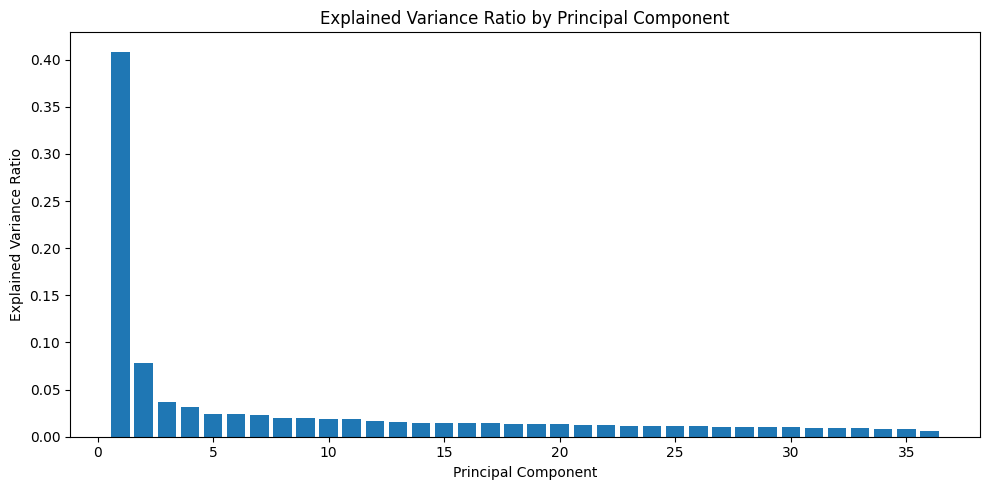

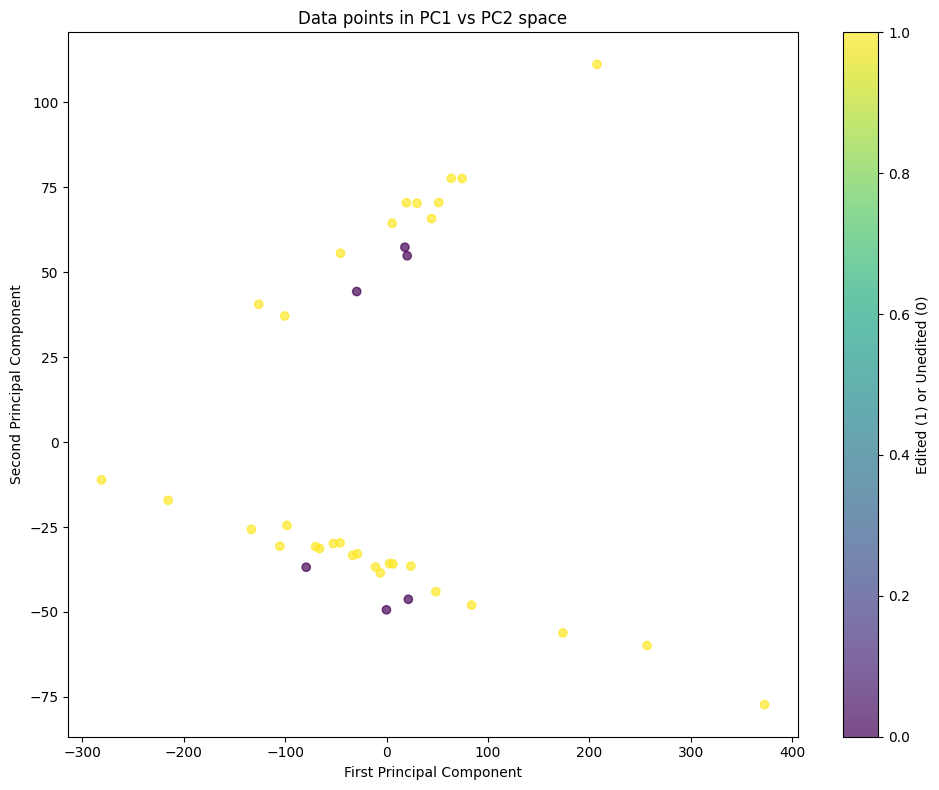

In [50]:
# Assuming we've already performed the PCA as in the previous steps
# and we have pca_final, pca_result_final, and df_pca

# Plot 1: Explained Variance Ratio
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(pca_final.explained_variance_ratio_) + 1), pca_final.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.tight_layout()
plt.show()

# Plot 2: Data points in PC1 vs PC2 space
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Edited or unedited'], cmap='viridis', alpha=0.7)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Data points in PC1 vs PC2 space')
plt.colorbar(scatter, label='Edited (1) or Unedited (0)')
plt.tight_layout()
plt.show()

Extracting which genes are most significant (if we stick with 2 principal components, can be modified later on)

In [33]:
# Print shapes for verification
print("Shape of pca_final.components_:", pca_final.components_.shape)
print("Shape of pca_df:", pca_df.shape)

# Get the correct gene IDs (should be 39376 of them)
gene_ids = pca_df.columns  # This should be the correct gene IDs

print("Number of gene IDs:", len(gene_ids))

# Create a DataFrame of the PCA components
components_df = pd.DataFrame(
    pca_final.components_,  # No need to transpose, it's already in the correct orientation
    columns=gene_ids,
    index=[f'PC{i+1}' for i in range(pca_final.n_components_)]
)

# Transpose components_df so that genes are rows and PCs are columns
components_df = components_df.T

# Function to get top contributing genes for a given PC
def get_top_genes(pc_number, n=3):
    pc = components_df[f'PC{pc_number}']
    top_positive = pc.nlargest(n)
    top_negative = pc.nsmallest(n)
    return pd.concat([top_positive, top_negative])
    #top_genes = pc.abs().nlargest(n)  # Get top n by magnitude
    #return top_genes

# Get top contributing genes for first 2 pc's
for i in range(1, 3):
    print(f"\nTop contributing genes for PC{i}:")
    print(get_top_genes(i))

# Calculate the overall importance of each gene across all PCs
gene_importance = np.sum(components_df**2, axis=1)
top_genes = gene_importance.nlargest(20)

print("\nTop 20 most important genes overall:")
print(top_genes)

# Print final shapes to verify
print("\nFinal shape of components_df:", components_df.shape)

Shape of pca_final.components_: (14, 39376)
Shape of pca_df: (38, 39376)
Number of gene IDs: 39376

Top contributing genes for PC1:
GeneID
23190        0.008480
55749        0.008480
27316        0.008469
105371344   -0.003948
101927087   -0.003618
105378480   -0.003568
Name: PC1, dtype: float64

Top contributing genes for PC2:
GeneID
5645     0.017950
5798     0.017747
3303     0.017485
3248    -0.017481
3848    -0.017427
65061   -0.017419
Name: PC2, dtype: float64

Top 20 most important genes overall:
GeneID
100189207    0.001624
492307       0.001492
26189        0.001475
10630        0.001475
431707       0.001475
105378879    0.001475
2703         0.001475
353142       0.001475
105373401    0.001475
105373507    0.001475
101927360    0.001475
105373750    0.001475
101929963    0.001475
4632         0.001475
105376960    0.001475
105377192    0.001475
105374507    0.001475
105377285    0.001475
105377614    0.001475
102524628    0.001475
dtype: float64

Final shape of components_df